In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly import graph_objects as go
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_11940\4103071423.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


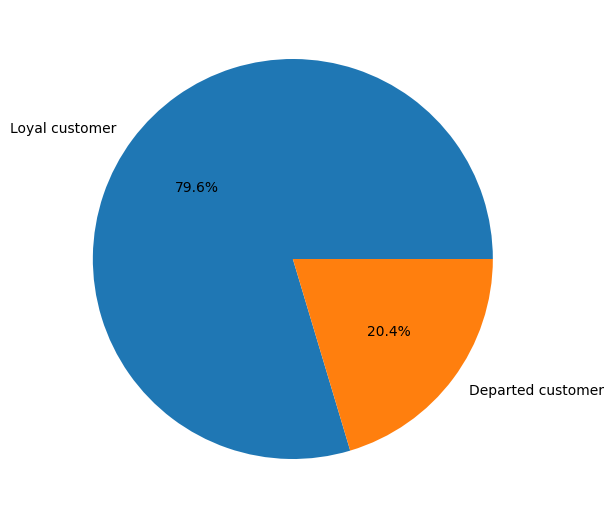

In [3]:
depart_loyal = churn_data['Exited'].value_counts()
depart_loyal_label = 'Loyal customer', 'Departed customer'
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    depart_loyal,
    labels=depart_loyal_label,
    autopct='%.1f%%'
)
fig.show()

Большая часть клиентов (~4/5 от общего числа) активно пользуются услугами банка и приносят прибыль.

-------------------------------------------------------

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0, 0.5, 'Amount of people')

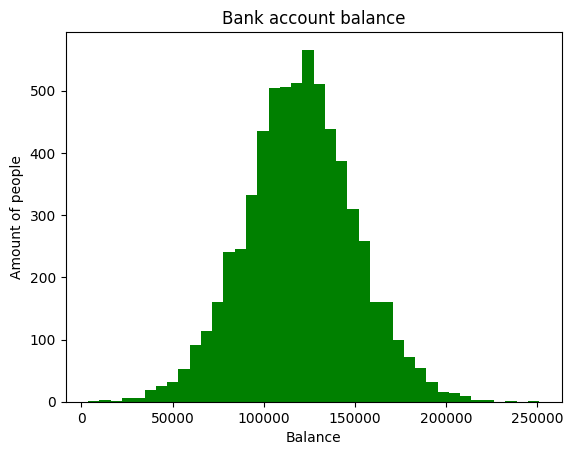

In [4]:
cust_balance = churn_data[churn_data['Balance'] > 2500]['Balance']
plt.hist(
    x = cust_balance,
    color = 'green',
    bins = 40
    
)
plt.title('Bank account balance')
plt.xlabel('Balance')
plt.ylabel('Amount of people')

В среднем у пользователей на счету имеется 100000-150000 у.е., количество денег уменьшается от среднего значения плавно, без резких скачков.

---------------

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [5]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=cust_balance[churn_data['Exited'] == 0],
                           opacity=0.75, 
                           name='Active user account balance'))
fig.add_trace(go.Histogram(x=cust_balance[churn_data['Exited'] == 1],
                           opacity=0.75,
                           name='Inactive user account balance'))
fig.update_layout(
    title="Money in the bank account of active and inactive clients",
    title_x = 0.5,
    xaxis_title="Amount of money",
    yaxis_title="Amount of people",
    legend=dict(x=.5, xanchor="center", orientation="h"),
    barmode='overlay',
    margin=dict(l=0, r=0, t=30, b=0))

fig.show()

Явной разницы в балансе у активных и ушедших клиентов не наблюдается, но среди ушедших есть клиенты с максимальными вкладами. Трудно оценить причину ухода, не зная продуктов банка и конкурентов, предположим, что причинами ухода клиентов могли являться:
1. Низкий ежегодный процент по вкладам, судя по ушедшим клиентам с максимальными вкладами.
2. Высокая кредитная ставка
3. Неудобная платформа для взаимодействия со своим счётом, в сравнении с конкурентами.
4. Малое количество отделений банка и банкоматов/терминалов.

----------------

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [6]:
churn_box = churn_data.replace({'Exited':{0:'Loyal', 1:'Exited'}})
fig = px.box(churn_box, x="Exited", y="Age")
fig.show()

Большинство ушедших клиентов банка имеют возраст от 38 до 51 года, наибольшее внимание стоит обратить на эту группу.

-------------

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_11940\2085471781.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



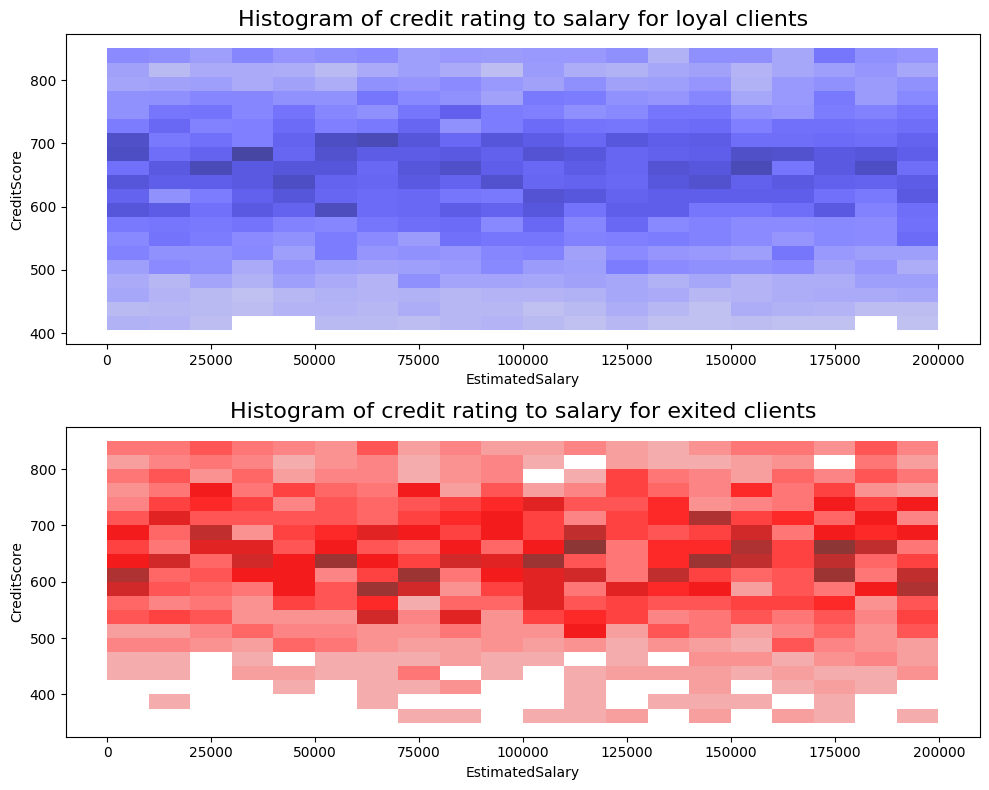

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].set_title('Histogram of credit rating to salary for loyal clients', fontsize=16)
sns.histplot(
    data=churn_data[churn_data['Exited'] == 0],
    x='EstimatedSalary',
    y='CreditScore',
    bins=20,
    color='blue',
    ax=axes[0]
)
axes[1].set_title('Histogram of credit rating to salary for exited clients', fontsize=16)
sns.histplot(
    data=churn_data[churn_data['Exited'] == 1],
    x='EstimatedSalary',
    y='CreditScore',
    bins=20,
    color='red',
    ax=axes[1]
)

fig.tight_layout()
fig.show()

Явной разницы нет, один уровень зарплаты не является ключевым фактором для формирования кредитного рейтинга.

-------------------------

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

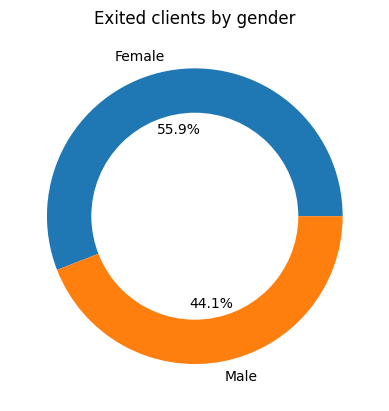

In [40]:
gender_exited = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()
plt.pie(gender_exited, labels=gender_exited.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Exited clients by gender')

plt.show()

Женщины уходят чаще.

---------------

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [73]:
cust_products = churn_box.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=cust_products,
    x='NumOfProducts',
    y='IsActiveMember',
    color='Exited',
    title='The number of services of loyal and exited customers',
    labels = {'NumOfProducts': 'Num of products', 
              'IsActiveMember': 'Amount of people'}
)
fig.show()

Меньше услуг - больше отток.

----------------

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [84]:
cust_active = churn_box.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
cust_active = cust_active.replace({'IsActiveMember':{0: 'Inactive', 1: 'Active'}})
fig = px.bar(
    data_frame=cust_active,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    title='The number of services of loyal and exited customers',
    labels = {'IsActiveMember': 'Сlient activity', 
              'CustomerId': 'Amount of people'}
)
fig.show()

Неактивные клиенты уходят чаще.

Банку нужно увеличить количество активных клиентов, возможно заключить контракты на зарплатные проекты с организациями, так же, в том числе для удержания, предлагать выгодные условия на партнёрские подписочные сервисы или предлагать повышенный кешбек на категории или определённые торговые площадки.

------------

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [109]:
cust_exited = churn_data.groupby(['Geography'], as_index=False).mean()

fig = px.choropleth(
    data_frame=cust_exited, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1],
    title='Percentage of exited customers', #заголовок
    width=600, #ширина
    height=400, #высота
    color_continuous_scale='twilight' #палитра цветов
)
fig.show()

C:\Users\qwaiv\AppData\Local\Temp\ipykernel_11940\1362350138.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



В Германии наибольшая доля ушедших клиентов.  
О причинах оттока говорить сложно, не зная услуги банка и их качество, можем только предположить причины оттока:
1. Низкий ежегодный процент по вкладам.
2. Высокая кредитная ставка
3. Неудобная платформа для взаимодействия со своим счётом, в сравнении с конкурентами.
4. Малое количество отделений банка и банкоматов/терминалов.

------------

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [104]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Exited                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

Text(0.5, 1.0, 'Тепловая карта ')

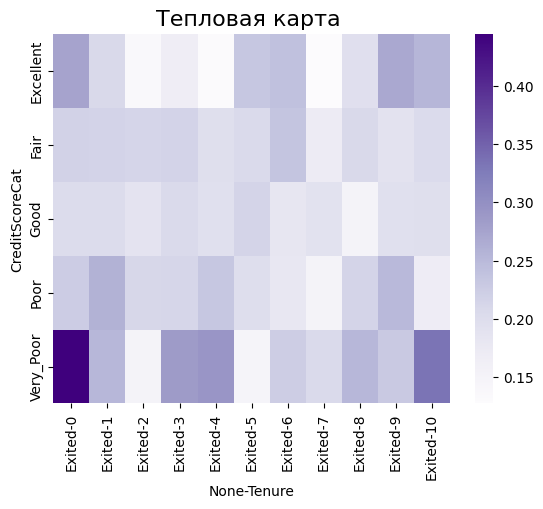

In [111]:
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
cat_score=churn_data.groupby(['CreditScoreCat','Tenure'])[['Exited']].mean().unstack()
display(cat_score)
heatmap = sns.heatmap(data=cat_score, cmap='Purples')
heatmap.set_title('Тепловая карта ', fontsize=16)

Чаще всего уходят клиенты с очень низким кредитным рейтингом, пользующиеся услугами банка менее года.

1. В Задание №9.2 хороший вывод, его можно также дополнить: распределение похоже на нормальное.
2. В Задание №9.3 изначально не нужно было ограничивать баланс, тогда вывод бы был: Мы видим большое смещение лояльных клиентов к нулю, это вызвано большим количеством клиентов с нулевым балансом. Стоит отдельно рассмотреть клиентов с нулевым балансом. Аналитику с исключением клиентов с нулевым балансом или балансом выше определенной суммы можно было сделать дополнительно.
3. В Задание №9.4 в признак "Exited" также можно добавить в color, чтобы еще сильнее подчеркнуть различие между категориями.
4. В Задание №9.5 хороший вывод. Также если использовать в данном задании график типа scatter и отобразить обе категории на одном графике, то можно заметить, что: только у ушедших клиентов есть рейтинг ниже 400.
5. В Задание №9.7 более корректный вывод: Самое большое количество ушедших клиентов воспользовались только одним продуктом банка. Довольно печальная картина с клиентами, которые воспользовались 3 и 4 продуктами, там доля ушедших клиентов намного превышает лояльных, а с 4-мя продуктами так вообще составляет 100%.
6. В Задание №9.9 выбранный range_color=[0, 1] – большой, если мы обратим внимание на данные они не превышают 0.4 и чтобы цвет лучше отражал зависимости в данных лучше range_color=[0, 0.4].